# Homework 6

Section 8.6

Math 404

Winter 2020

<Name>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import product #cartesian product -- avoid the syntax of nested for loops.
from sklearn import linear_model

## Exercise 8.24
Consider the univariate AR(1) models of the form $Z_t = c + \phi Z_{t-1} + \varepsilon_t$,
where $\varepsilon_t \sim \mathscr{N}(0, \frac{1}{4})$.
Simulate (and plot) such time series for $t \in \{0, \ldots, 50\}$ with the following parameter values:

(i) $c= 0$, $\phi = 0.5$

(ii) $c= 0$, $\phi = 1.5$

(iii) $c= 0$, $\phi = 1.0$

(iv) $c= 1$, $\phi = 0.5$

(v) $c= 1$, $\phi = 1.5$

(vi) $c= 1$, $\phi = 1.0$

(vii) $c= -1$, $\phi = 0.5$

(viii) $c= -1$, $\phi = 1.5$

(ix) $c= -1$, $\phi = 1.0$

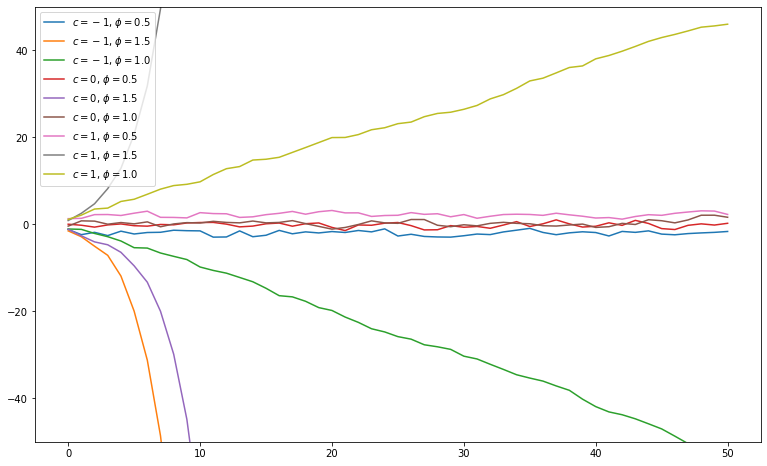

In [2]:
fig = plt.figure(figsize=(13, 8))
N = 51

cs = [-1, 0, 1]
phis = [0.5, 1.5, 1.0]
for c, phi in product(cs, phis):
    
    #Draw from epsilon.
    variance = 1/4
    stdev = np.sqrt(variance)
    epsilons = np.random.normal(loc=0, scale=stdev, size=N)
    
    #Make z.  I'm going to assume Z_{-1} = 0.
    z = np.empty(N)
    z[-1] = 0 #Syntax hack to use Z_50 as a placeholder for Z_{-1}
    for t, eps in enumerate(epsilons):
        z[t] = c + phi * z[t-1] + eps
    
    plt.plot(z, label=r"$c = {0}$, $\phi = {1:.2}$".format(c, phi))

plt.ylim([-50, 50])
plt.legend()
plt.show()       

## Exercise 8.25
Consider the univariate AR(2) models of the form $Z_t = c + \phi_1 Z_{t-1} + \phi_2 Z_{t-2} + \varepsilon_t$,
where $\varepsilon_t \sim \mathscr{N}(0, \frac{1}{4})$.
Simulate (and plot) such time series for $t \in \{0, \ldots, 50\}$ with the following parameter values:

(i) $c=0$, $\phi_1 = 0$, $\phi_2 = 4$

(ii) $c=0$, $\phi_1 = 0$, $\phi_2 = 1$

(iii) $c=0$, $\phi_1 = 0$, $\phi_2 = 0.25$

(iv) $c=1$, $\phi_1 = 0$, $\phi_2 = 4$

(v) $c=1$, $\phi_1 = 0$, $\phi_2 = 1$

(vi) $c=1$, $\phi_1 = 0$, $\phi_2 = 0.25$

(vii) $c=-1$, $\phi_1 = 0$, $\phi_2 = 4$

(viii) $c=-1$, $\phi_1 = 0$, $\phi_2 = 1$

(ix) $c=-1$, $\phi_1 = 0$, $\phi_2 = 0.25$

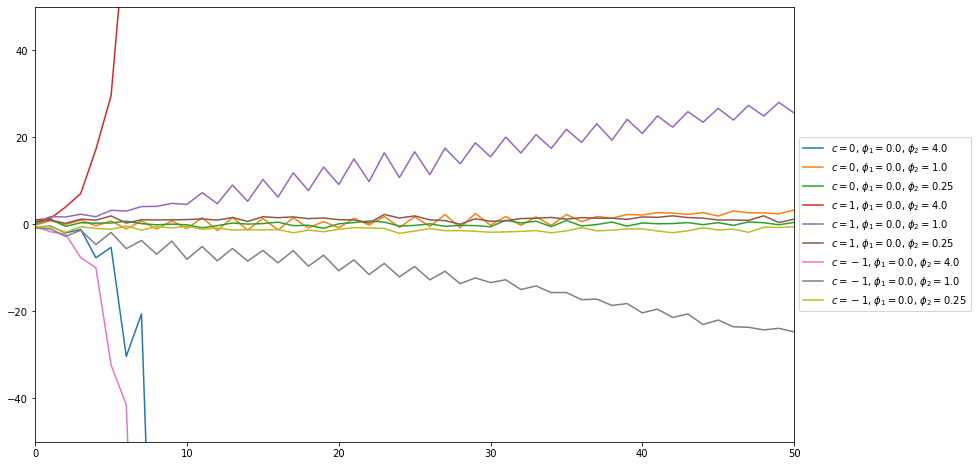

In [3]:
fig = plt.figure(figsize=(17, 8))

cs = [0, 1, -1]
phi2s = [4., 1., .25]
phi1s = [0.]
for c, phi1, phi2 in product(cs, phi1s, phi2s):
    
    #Draw from epsilon.
    variance = 1/4
    stdev = np.sqrt(variance)
    epsilons = np.random.normal(loc=0, scale=stdev, size=N)
    
    #Make z.  I'm going to assume Z_{-1} = 0 and Z_{-2} = 0.
    z = np.empty(N)
    z[-1] = 0 #Syntax hack to use Z_50 as a placeholder for Z_{-1}
    z[-2] = 0
    for t, eps in enumerate(epsilons):
        z[t] = c + phi1 * z[t-1] + phi2 * z[t-2] + eps
    
    plt.plot(z, label=r"$c = {0}$, $\phi_1 = {1:.2}$, $\phi_2 = {2:.2}$".format(c, phi1, phi2))

# Shrink current axis by 20%
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.ylim([-50, 50])
plt.xlim([0, 50])
plt.show()       

## Exercise 8.26
Consider the univariate MA(1) models of the form $Z_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1}$, where
$\varepsilon_t \sim \mathscr{N}(0, 1/4)$.
Simulate (and plot) such time series for $t \in \{0, \ldots, 50\}$ with the parameter values given below.
Also compute the sample autcorrelation $\hat{\gamma}_k$ for $k \in {0, \ldots, 10}$ for each of these
series and compare your answer to the values given in Theorem 8.6.8.

(i) $c=0$, $\theta_1=1$

(ii) $c=0$, $\theta_1=2$

(iii) $c=0$, $\theta_1=1/2$

(iv) $c=1$, $\theta_1=1$

(v) $c=1$, $\theta_1=2$

(vi) $c=1$, $\theta_1=1/2$

Autocorrelation with c = 0, and theta_1 = 1.0

	k = 0
	Sample covariance: 0.389
	Their gamma:       0.500

	k = 1
	Sample covariance: 0.153
	Their gamma:       0.250

	k = 2
	Sample covariance:-0.100
	Their gamma:       0.000

	k = 3
	Sample covariance:-0.086
	Their gamma:       0.000

	k = 4
	Sample covariance: 0.010
	Their gamma:       0.000

	k = 5
	Sample covariance: 0.121
	Their gamma:       0.000

	k = 6
	Sample covariance: 0.079
	Their gamma:       0.000

	k = 7
	Sample covariance:-0.060
	Their gamma:       0.000

	k = 8
	Sample covariance:-0.065
	Their gamma:       0.000

	k = 9
	Sample covariance:-0.030
	Their gamma:       0.000

	k = 10
	Sample covariance: 0.017
	Their gamma:       0.000

Autocorrelation with c = 0, and theta_1 = 2.0

	k = 0
	Sample covariance: 0.738
	Their gamma:       1.250

	k = 1
	Sample covariance: 0.185
	Their gamma:       0.500

	k = 2
	Sample covariance: 0.019
	Their gamma:       0.000

	k = 3
	Sample covariance: 0.030
	Their gamma:       0.000

	k = 

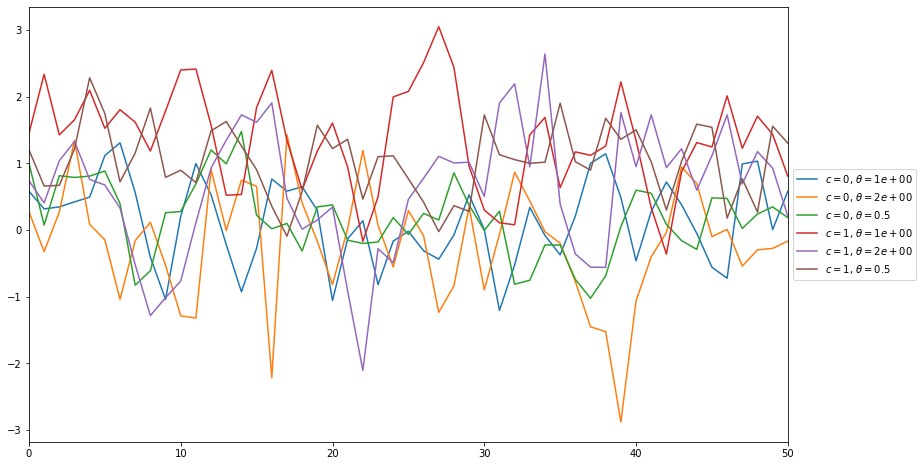

In [4]:
fig = plt.figure(figsize=(17, 8))

cs = [0, 1]
thetas = [1., 2., 1/2]
for c, theta in product(cs, thetas):
    
    #Draw from epsilon.
    variance = 1/4
    stdev = np.sqrt(variance)
    eps = np.random.normal(loc=0, scale=stdev, size=N+1)
    
    #Make z.
    z = np.empty(N)
    for t in range(N):
        z[t] = c + eps[t] + theta * eps[t-1] 
    
    #plot
    plt.plot(z, label=r"$c = {0}$, $\theta={1:1.1}$".format(c, theta))
    
    #Check autocorrelation
    print("Autocorrelation with c = {0}, and theta_1 = {1}\n".format(c, theta))
    for k in range(11):
        z_forward = z[k:]
        z_backward = z[:-k] if k>0 else z
        my_gamma_k = np.cov(np.vstack((z_forward, z_backward)))[0,1]
        
        #Check versus formula.
        eps_cov = 1/4
        q = 2
        big_thetas = [1, theta]
        their_gamma_k = 0.
        for j in range(q-k):
            their_gamma_k += big_thetas[j+k] * eps_cov * big_thetas[j]
        
        print("\tk =", k)
        print("\tSample covariance:{:6.3f}".format(my_gamma_k))
        print("\tTheir gamma:      {:6.3f}".format(their_gamma_k))
        print()
        
        
        
        

# Shrink current axis by 20%
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim([0, 50])
plt.show()       

## Exercise 8.28

Do the following for the Provo air-quality time series $z_t = \hat{T}_{t} + \hat{S}_{t} + \hat{R}_{t}$ of Exercise 8.23.

In [5]:
# Necessary code from previous assignment goes here.
z = pd.read_csv("hw85_data.csv", skiprows=[1,2], index_col=0)['NP']
times = pd.to_datetime(z.index)
start = times.min()
end = times.max()
z.index = pd.date_range(start=start, end=end, freq='1H')

### Part (i)
Check to see if ($z_t$) is easily identifiable as an AR(2) model by regressing $z_t$ on the lags $z_{t-1}$ and $z_{t-2}$ (and a constant term!).  The $R^2$ should give a reasonable sense of how good the fit is.

In [6]:
def ex828part1(z):
    
    #Set up lags
    lag1 = z.shift(periods=1)
    lag2 = z.shift(periods=2)
    df = pd.DataFrame({0:z, 1:lag1, 2:lag2})
    
    #Don't use cases where the lags aren't available.
    df.dropna(axis=0,how='any', inplace=True)
    X, y = df.iloc[:,1:], df.iloc[:,0]
    
    #Run the regression. Get constant term by fitting intercept.
    reg = linear_model.LinearRegression(fit_intercept=True)
    reg.fit(X, y)
    
    R2 = reg.score(X, y)
    
    return R2

print("R^2 score:", ex828part1(z))

R^2 score: 0.6763725976321555


### Part (ii)
Repeat part (i) for $\Delta^j z_t$ for each $j \in \{1, 2, 3\}$

In [7]:
djz = z
for j in [1, 2, 3]:
    djz = djz.diff()
    print("R^2 score when j={0}: {1}".format(j,ex828part1(djz)))

R^2 score when j=1: 0.06336013377025762
R^2 score when j=2: 0.3399521777342329
R^2 score when j=3: 0.5520862369785926
